<a href="https://colab.research.google.com/github/andreamurari/chess_project/blob/main/chess_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

##**Data-set presentation**

In [ ]:
chess_df = pd.read_csv('/content/chess.csv')

In [ ]:
chess_df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13.0,outoftime,white,15+2,bourgris,1500.0,a-00,1191.0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5.0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16.0,resign,black,5+10,a-00,1322.0,skinnerua,1261.0,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4.0
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61.0,mate,white,5+10,ischia,1496.0,a-00,1500.0,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3.0


In [ ]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13878 entries, 0 to 13877
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              13878 non-null  object 
 1   rated           13878 non-null  bool   
 2   created_at      13878 non-null  float64
 3   last_move_at    13878 non-null  float64
 4   turns           13877 non-null  float64
 5   victory_status  13877 non-null  object 
 6   winner          13877 non-null  object 
 7   increment_code  13877 non-null  object 
 8   white_id        13877 non-null  object 
 9   white_rating    13877 non-null  float64
 10  black_id        13877 non-null  object 
 11  black_rating    13877 non-null  float64
 12  moves           13877 non-null  object 
 13  opening_eco     13877 non-null  object 
 14  opening_name    13877 non-null  object 
 15  opening_ply     13877 non-null  float64
dtypes: bool(1), float64(6), object(9)
memory usage: 1.6+ MB


In [ ]:
chess_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,1.387800e+04,1.387800e+04,13877.000000,13877.000000,13877.000000,13877.000000
mean,1.478789e+12,1.478681e+12,59.520357,1586.383440,1577.477337,4.755279
std,3.213015e+10,3.449445e+10,33.511577,297.860466,298.823536,2.761346
min,1.376772e+12,1.500000e+01,1.000000,784.000000,789.000000,1.000000
25%,1.463898e+12,1.463860e+12,36.000000,1383.000000,1375.000000,3.000000
50%,1.492470e+12,1.492465e+12,54.000000,1549.000000,1541.000000,4.000000
75%,1.502820e+12,1.502820e+12,78.000000,1784.000000,1776.000000,6.000000
max,1.504488e+12,1.504489e+12,349.000000,2700.000000,2723.000000,28.000000


***DATA HANDLING***

In [ ]:
chess_df_backup = chess_df.copy()

In [ ]:
chess_df.drop(['moves', 'white_id', 'black_id', 'id', 'created_at', 'last_move_at', 'rated'], axis=1, inplace = True )

In [ ]:
chess_df['white_win'] = ( chess_df['winner'] == 'white' ) * 1

In [ ]:
chess_df['black_win'] = ( chess_df['winner'] == 'black' ) * 1

In [ ]:
chess_df.head(3)

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,white_win,black_win
0,13.0,outoftime,white,15+2,1500.0,1191.0,D10,Slav Defense: Exchange Variation,5.0,1,0
1,16.0,resign,black,5+10,1322.0,1261.0,B00,Nimzowitsch Defense: Kennedy Variation,4.0,0,1
2,61.0,mate,white,5+10,1496.0,1500.0,C20,King's Pawn Game: Leonardis Variation,3.0,1,0


***GENERAL CORRELATION***

In [ ]:
chess_corr = chess_df.corr()

<ipython-input-11-d72e7566516b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chess_corr = chess_df.corr()


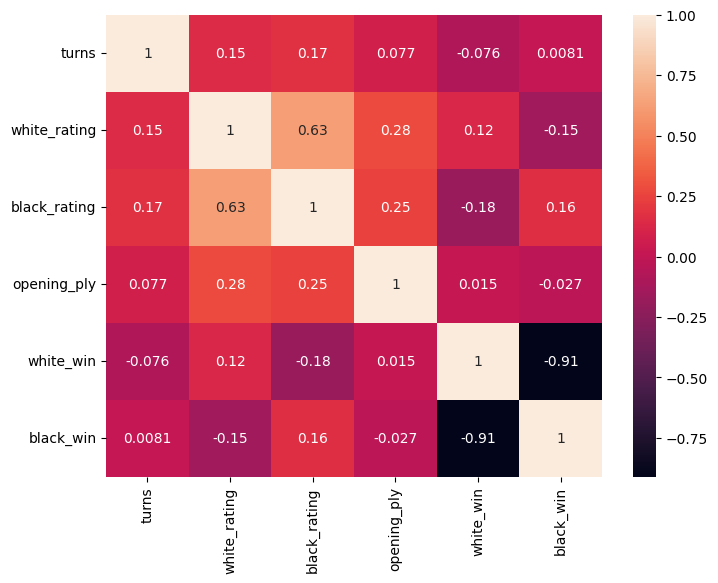

In [ ]:
plt.figure(figsize=(8, 6))
sb.heatmap(chess_corr, annot = True, )

plt.show()

As a first impression, the only parameters that seems to have a little correlation are:

* **white_rating and black_rating:** positive correlation, this is because matchmaking software matches opponents with similar ratings.
* **white_win and black_win:** negative correlation, obviously because if one player win, then the other loose. The correlation is not -1 because there can be some draws.

## **Which are the most common matches outcomes? What are the most played type of matches?**

***MOST COMMON MATCHES OUTCOMES***

In [ ]:
endgame_reason_df = chess_df['victory_status'].value_counts()

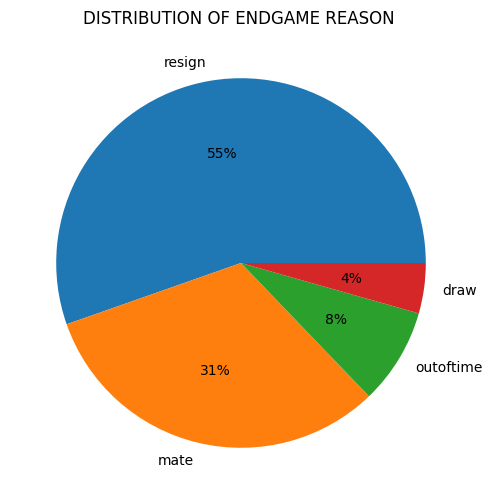

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(endgame_reason_df, labels = endgame_reason_df.index, autopct = '%i%%')
plt.title('DISTRIBUTION OF ENDGAME REASON ')

plt.show()

It's easy to see that the most endgame reason is "resign" followed by "checkmate". "Draws" and "out of time" are widely less frequent.

***MOST PLAYED TYPE OF MATCHES***

First, I generate a boolean mask to exclude the least played match types ( <  2% of the total 20.000+ matches)

In [ ]:
most_played_mask = chess_df['increment_code'].value_counts() > chess_df['increment_code'].value_counts().sum() * 0.02

Then I create a DataFrame of the most played type of matches so it can be plotted in a pie-chart. This DF groups match types played less than 2% of the total at the 'other' index.

In [ ]:
most_played_df = chess_df['increment_code'].value_counts()[most_played_mask]

In [ ]:
other = chess_df['increment_code'].value_counts().sum()- most_played_df.sum()
other_dict={'other':other}
other_series = pd.Series(other_dict)

In [ ]:
all_type_df = most_played_df.append(other_series, ignore_index= False)

<ipython-input-18-a4ae287d70ea>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_type_df = most_played_df.append(other_series, ignore_index= False)


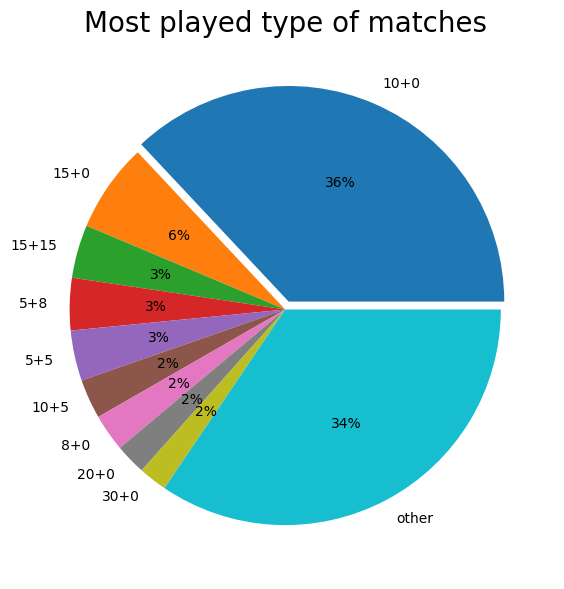

In [ ]:
plt.figure(figsize = (7,7))
explode = (0.04, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(all_type_df, labels = all_type_df.index, explode = explode, autopct = '%i%%')
plt.title('Most played type of matches', fontdict={'fontsize':'20'})

plt.show()

It's higlited that the most frequently played match types are the 10+0. All other types are definitely less played.

## **Is there some correlation between starting with white pieces and the outcome of the match? How does the situation changes when matches became longer in terms of number of turns?**

The first question can be easily answered plotting a bar-chart of the distribution of matches outcomes.

In [ ]:
winner_df = chess_df['winner'].value_counts()
winner_df

white    6911
black    6325
draw      641
Name: winner, dtype: int64

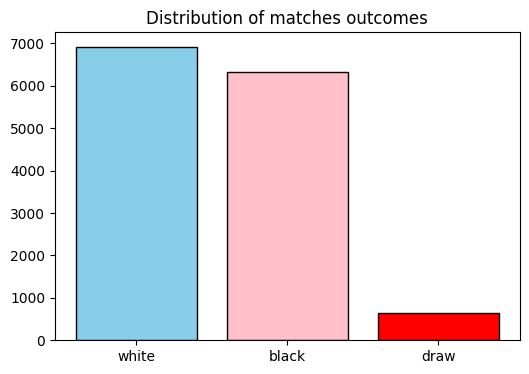

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(winner_df.index, winner_df, color = ('skyblue', 'pink', 'red'), edgecolor = 'black')
plt.title('Distribution of matches outcomes')

plt.show()

As we can see, white players have few more wins than black ones but the difference is very small:

In [ ]:
difference = chess_df['winner'].value_counts()['white']-chess_df['winner'].value_counts()['black']
difference

586

In [ ]:
difference_pct = int((chess_df['winner'].value_counts('pct')['white']-chess_df['winner'].value_counts('pct')['black'])*100)
print(difference_pct, '%')

4 %


only 894 matches (4%).

Now it will be analyzed if the difference get bigger o smaller when matches have higher and lower number of turns. Matches with 79 (75% of turns distribution) or more  turns will be considered many-turns matches and matches with 37 (25% of turns distribution) or less turns will be consideredthan few-turns matches. The first step is to generate the two DF.

In [ ]:
many_turns_matches_mask = chess_df ['turns'] >= 79
many_turns_matches_df = chess_df[many_turns_matches_mask]
mtm_winner_df = many_turns_matches_df['winner'].value_counts()

few_turns_matches_mask = chess_df ['turns'] <= 37
few_turns_matches_df = chess_df[few_turns_matches_mask]
ftm_winner_df = few_turns_matches_df['winner'].value_counts()

***MANY-TURNS MATCHES***

In [ ]:
mtm_winner_df

white    1538
black    1509
draw      359
Name: winner, dtype: int64

In [ ]:
difference =mtm_winner_df['white']-mtm_winner_df['black']
difference

29

In [ ]:
difference_pct = round((many_turns_matches_df['winner'].value_counts('pct')['white']-many_turns_matches_df['winner'].value_counts('pct')['black'])*100)
print(difference_pct, '%')

1 %


It can be noticed that the percentage of white winning in many-turns matches, is decreased compared to the original data set matches.

***FEW-TURNS MATCHES***

In [ ]:
difference = ftm_winner_df['white']-ftm_winner_df['black']
difference

448

In [ ]:
difference_pct = round((few_turns_matches_df['winner'].value_counts('pct')['white']-few_turns_matches_df['winner'].value_counts('pct')['black'])*100)
print(difference_pct, '%')

12 %


By contrast, the percentage of white winning in the few-turns matches DF is increased.

***PLOTS***

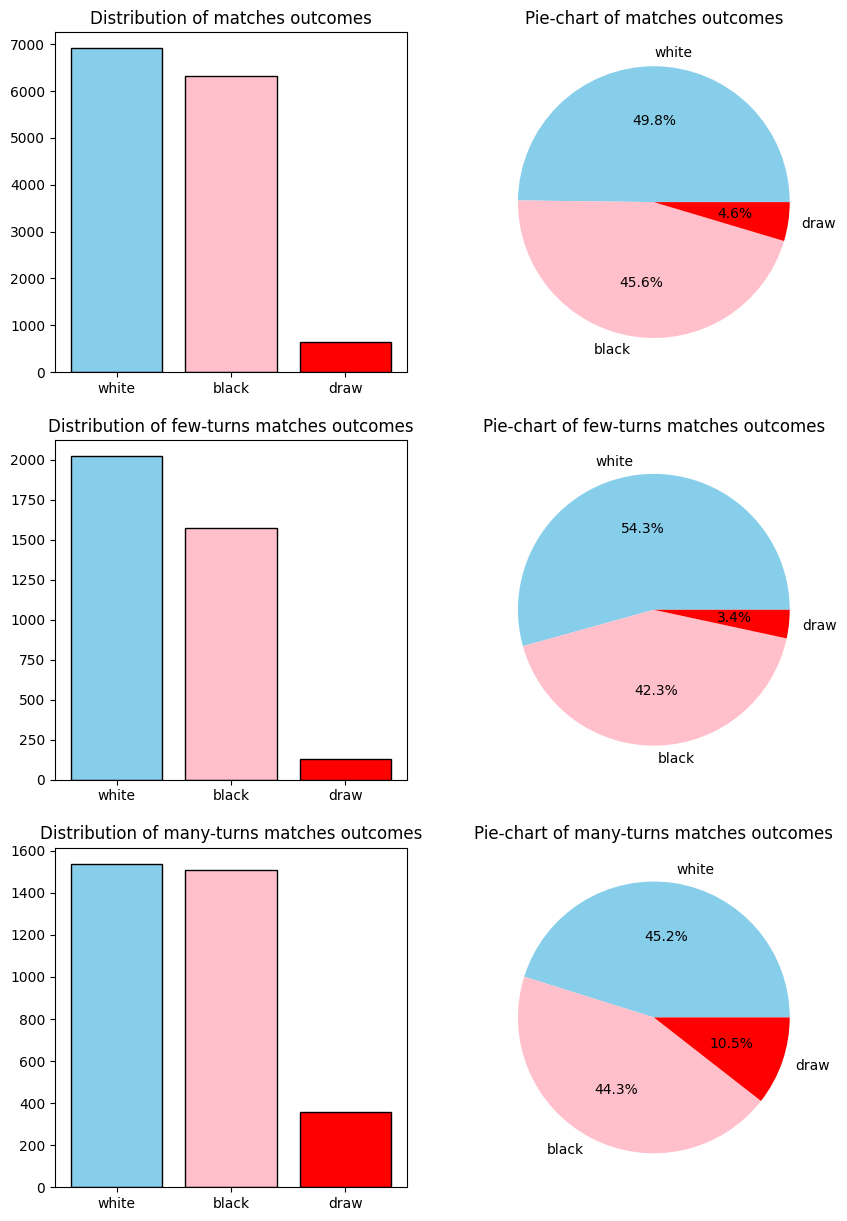

In [ ]:
fig_1 = plt.figure(figsize=(10,15))
ax_1 = fig_1.add_subplot(3, 2, 1)
ax_2 = fig_1.add_subplot(3, 2, 2)
ax_3 = fig_1.add_subplot(3, 2, 3)
ax_4 = fig_1.add_subplot(3, 2, 4)
ax_5 = fig_1.add_subplot(3, 2, 5)
ax_6 = fig_1.add_subplot(3, 2, 6)

ax_1.bar(winner_df.index, winner_df, color = ('skyblue', 'pink', 'red'), edgecolor = 'black')
ax_1.set_title('Distribution of matches outcomes')

ax_2.pie(winner_df, labels = winner_df.index, autopct = '%.1f%%', colors = ('skyblue', 'pink', 'red'))
ax_2.set_title('Pie-chart of matches outcomes')

ax_3.bar(ftm_winner_df.index, ftm_winner_df, color = ('skyblue', 'pink', 'red'), edgecolor = 'black')
ax_3.set_title('Distribution of few-turns matches outcomes')

ax_4.pie(ftm_winner_df, labels = ftm_winner_df.index, autopct = '%.1f%%', colors = ('skyblue', 'pink', 'red'))
ax_4.set_title('Pie-chart of few-turns matches outcomes')

ax_5.bar(mtm_winner_df.index, mtm_winner_df, color = ('skyblue', 'pink', 'red'), edgecolor = 'black')
ax_5.set_title('Distribution of many-turns matches outcomes')

ax_6.pie(mtm_winner_df, labels = mtm_winner_df.index, autopct = '%.1f%%', colors = ('skyblue', 'pink', 'red'))
ax_6.set_title('Pie-chart of many-turns matches outcomes')

plt.show()

From this figure, can also be noticed that the percentage of draws increas in many-turns matches.

## **What are the best opening moves for white player? And for black one?**

***DATA-FRAMES GENERATION***

Two new DataFrames are generated: the first goups the most common openings when white player wins and the second is the same but for matches in wich black player is the winner (only openings that have been used at least 2% of the considered matches are analyzed).

In [ ]:
white_win_mask = chess_df['winner'] == 'white'
white_win_df = chess_df[white_win_mask]

common_openings_white_win_mask = white_win_df['opening_eco'].value_counts('pct') > 0.02
co_white_win_df = white_win_df['opening_eco'].value_counts()[common_openings_white_win_mask]

co_white_win_pct_df = co_white_win_df / co_white_win_df.sum()

co_white_win_pct_df

C00    0.103757
A00    0.099276
B01    0.097553
B00    0.093761
C41    0.089969
A40    0.083075
D00    0.080662
C20    0.072044
C40    0.068252
B20    0.057222
C50    0.055153
D02    0.050672
C44    0.048604
Name: opening_eco, dtype: float64

In [ ]:
black_win_mask = chess_df['winner'] == 'black'
black_win_df = chess_df[black_win_mask]

common_openings_black_win_mask = black_win_df['opening_eco'].value_counts('pct') > 0.02
co_black_win_df = black_win_df['opening_eco'].value_counts()[common_openings_black_win_mask]
co_black_win_pct_df = co_black_win_df / co_black_win_df.sum()

co_black_win_pct_df

A00    0.163780
C00    0.109843
B01    0.108661
C20    0.107087
D00    0.101969
B20    0.081102
A40    0.071260
C50    0.069291
C41    0.068110
B00    0.064173
D02    0.054724
Name: opening_eco, dtype: float64

Now, in order to compare white and black best opening moves, it's generated a new DF as follows:

In [ ]:
delta = co_black_win_df - co_white_win_df
delta.fillna(co_black_win_df, inplace = True)
delta.fillna(co_white_win_df, inplace = True)

delta_pct = delta / (co_black_win_df + co_white_win_df)
delta_pct.fillna(delta / co_black_win_df, inplace = True)
delta_pct.fillna(delta / co_white_win_df, inplace = True)
delta_pct

A00    0.181818
A40   -0.142180
B00   -0.250575
B01   -0.012522
B20    0.107527
C00   -0.037931
C20    0.130977
C40    1.000000
C41   -0.202765
C44    1.000000
C50    0.047619
D00    0.050710
D02   -0.027972
Name: opening_eco, dtype: float64

***PLOTS***

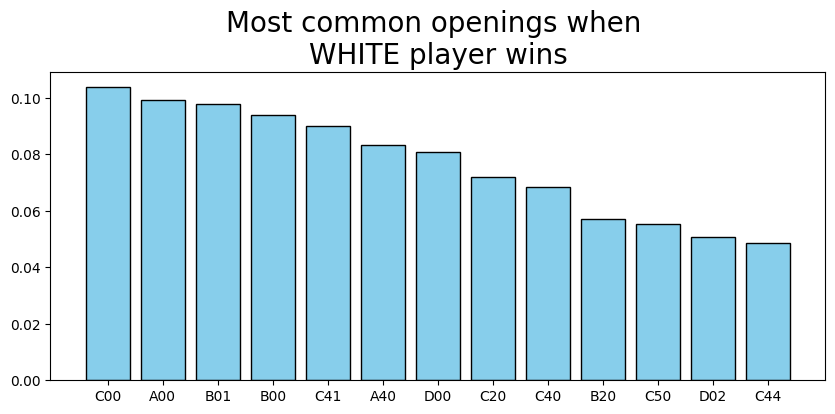

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(co_white_win_pct_df.index, co_white_win_pct_df, color = ('skyblue'), edgecolor = 'black')
plt.title('Most common openings when \nWHITE player wins', fontdict={'fontsize':'20'})

plt.show()

This bar-chart shows that the distribution of opening moves is quite regular: the frequencies of C00, A00, C41, B00, B01, D00 and A40 are very close.

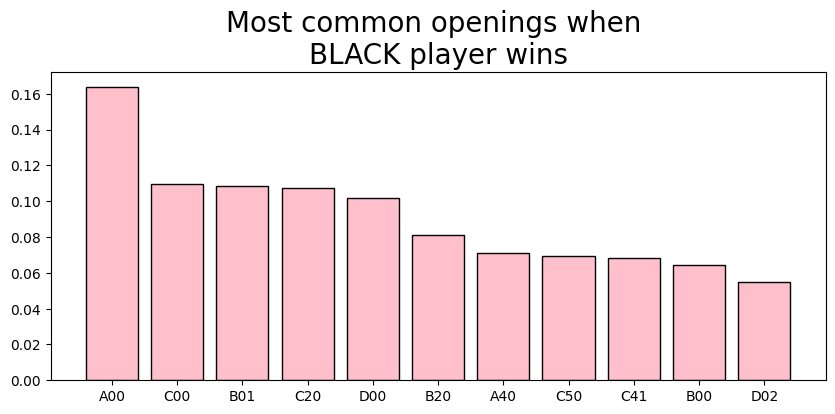

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(co_black_win_pct_df.index, co_black_win_pct_df, color = ('pink'), edgecolor = 'black')
plt.title('Most common openings when \nBLACK player wins', fontdict={'fontsize':'20'})

plt.show()

In this case, howevere, the distribution has a peak in A00, but then it's quite regular.

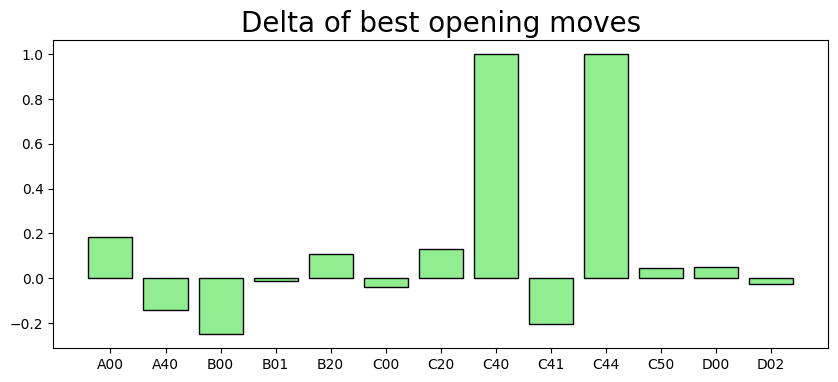

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(delta_pct.index, delta_pct, color = ('lightgreen'), edgecolor = 'black')
plt.title('Delta of best opening moves', fontdict={'fontsize':'20'})

plt.show()

This bar-chart must be read as follows:


*   positive values refear to good openings for black player;
*   negtive values refear to good openings for white player.

(Example: B00: -0,25 indicates that in a match that has B00 as opening, white has a 25% greater chance of winning than black.)

**NOTE:** C40 can be considered the best opening move for black player with an efficency of almost 100%. This happens because C40 is rarely linked to a victory by the white player, so it recived a FALSE boolean value in the "common_opening_white_win_mask".

From this DF will be removed all the values under 10%: these openeing moves are considered only because they are quite frequently used but they are not linked to a significant difference of winning probability.


In [ ]:
significant_mask = abs(delta_pct) > 0.1
significant_delta = delta_pct[significant_mask]
significant_delta

A00    0.181818
A40   -0.142180
B00   -0.250575
B20    0.107527
C20    0.130977
C40    1.000000
C41   -0.202765
C44    1.000000
Name: opening_eco, dtype: float64

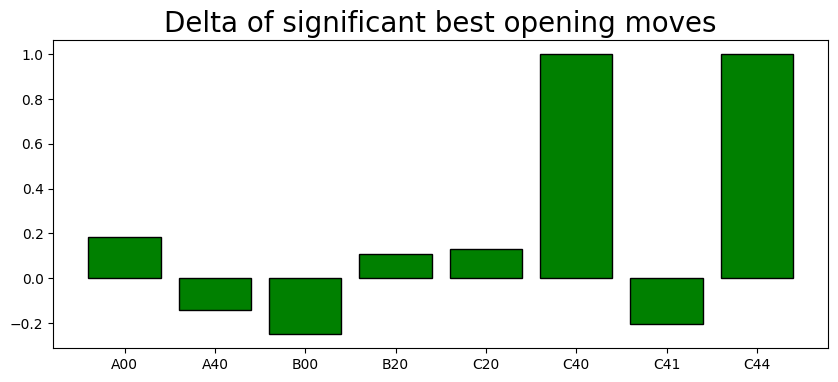

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(significant_delta.index, significant_delta, color = ('green'), edgecolor = 'black')
plt.title('Delta of significant best opening moves', fontdict={'fontsize':'20'})

plt.show()

This graph highlites that:

*   **C40** is the best opening move for black player, but also **A00** and **B00** are good choice;
*   **A40**, **B00** and **C41** are the best opeing options for white player.

